<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Artificial-dilution" data-toc-modified-id="Artificial-dilution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Artificial dilution</a></span><ul class="toc-item"><li><span><a href="#Initial-samples" data-toc-modified-id="Initial-samples-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Initial samples</a></span></li><li><span><a href="#deluted-samples" data-toc-modified-id="deluted-samples-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>deluted samples</a></span></li><li><span><a href="#Reproducability-vs-VAF-(SNP)" data-toc-modified-id="Reproducability-vs-VAF-(SNP)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Reproducability vs VAF (SNP)</a></span></li><li><span><a href="#VAF-vs-purity" data-toc-modified-id="VAF-vs-purity-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>VAF vs purity</a></span></li></ul></li><li><span><a href="#Generated-data" data-toc-modified-id="Generated-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generated data</a></span><ul class="toc-item"><li><span><a href="#Introduced-mutations" data-toc-modified-id="Introduced-mutations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Introduced mutations</a></span></li><li><span><a href="#recall-and-precision" data-toc-modified-id="recall-and-precision-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>recall and precision</a></span></li></ul></li></ul></div>

# Imports

In [ ]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
from ..functions.plotting import plot_reproducability_from_maf, plot_metric_for_generated_pats

Adjust plotting settings

In [ ]:
plt.rc('font', size=16)
# Set the axes title font size
plt.rc('axes', titlesize=16)
# Set the axes labels font size
plt.rc('axes', labelsize=30)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=16)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=16)
# Set the legend font size
plt.rc('legend', fontsize=18)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

# Artificial dilution

## Initial samples

Make a dictionary **maf_ini_dict** with maf DataFrames for initial samples (before dilution)

In [51]:
# MODIFY
# initial patients without dilution

patients = []
path2mafs = './'
maf_name = 'my_maf.maf'

In [2]:
maf_ini_dict = {}
for sample in patients:
    maf_path = os.path.join(path2mafs, sample, maf_name)
    
    # MODIFY maf_processing function from imports
    maf = maf_processing(maf_path)
    if not maf is None:
        # make unique mutation index in order to compare it with diluted sample ones
        maf.index = maf.Chromosome.astype(str)+'_'+maf.Start_Position.astype(str)+'_'+maf.Reference_Allele.astype(str)+'_'+maf.Tumor_Seq_Allele2.astype(str)
        maf_ini_dict[sample] = maf

## deluted samples

In [54]:
# MODIFY
# diluted patients; naming should be in line with template
# <patient>_<read_fraction>, where <patient> is name of
# initial sample and read_fraction - fraction of reads from
# tumor .fastq used during dilution

deluted_patients = []
path2delutedmafs = './'

# dict with diluted purity for each sample
# that is listed in deluted_patients
sample2purity = {}

In [55]:
maf_dict = {}
for sample in deluted_patients:
    maf_path = os.path.join(path2delutedmafs, sample, maf_name)
    
    # MODIFY maf_processing function from imports
    maf = maf_processing(maf_path)
    if not maf is None and sample.split('_')[0] in patients:
        # make unique mutation index in order to compare it with initial sample ones
        maf.index = maf.Chromosome.astype(str)+'_'+maf.Start_Position.astype(str)+'_'+maf.Reference_Allele.astype(str)+'_'+maf.Tumor_Seq_Allele2.astype(str)
        maf_dict[sample] = maf

## Reproducability vs VAF (SNP)

100%|██████████| 48/48 [00:00<00:00, 573.47it/s]


Text(0, 0.5, 'Reproducability')

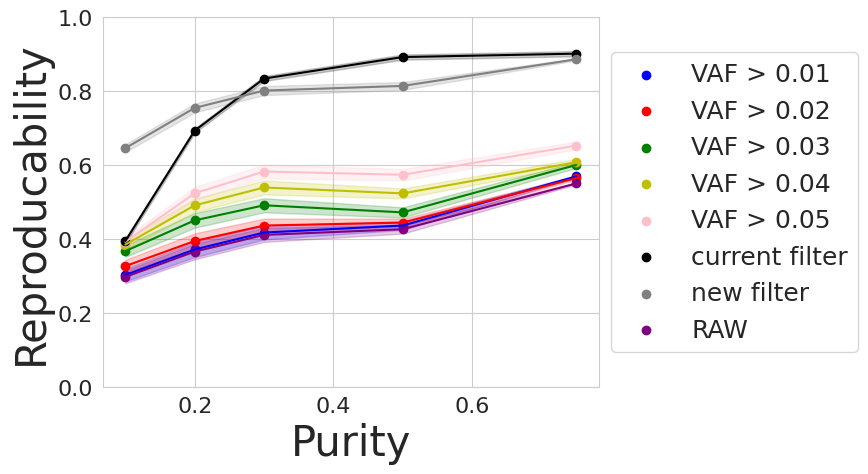

In [82]:
for color, VAF_threshold in zip(
    ['b', 'r', 'g', 'y', 'pink'],
    [0.01, 0.02, 0.03, 0.04, 0.05]
):
    plot_reproducability_from_maf(
        maf_ini_dict, maf_dict, color, label = f'VAF > {VAF_threshold}',
        current_filter=False, new_filter=False,
        basic=True, VAF_threshold=VAF_threshold
    )

plot_reproducability_from_maf(
    maf_ini_dict, maf_dict, color='black', label = 'internal filter',
    current_filter=True, new_filter=False,
    basic=False, VAF_threshold=0
)

plot_reproducability_from_maf(
    maf_ini_dict, maf_dict, color='grey', label = 'new filter',
    current_filter=False, new_filter=True,
    basic=False, VAF_threshold=0
)
 
plot_reproducability_from_maf(
    maf_ini_dict, maf_dict, color='purple', label = 'RAW',
    current_filter=False, new_filter=False,
    basic=False, VAF_threshold=0
)    
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0,1)
plt.xlabel('Purity')
plt.ylabel('Reproducability')

Below we plot reproducability in advanced_mode=True. This means, that reference set will be corrected by VAF estimated decrease. This can better show performance of our model, as some mutations might have no chances to pass the filter because of initial low VAF.

100%|██████████| 48/48 [00:00<00:00, 404.09it/s]


Text(0, 0.5, 'Reproducability')

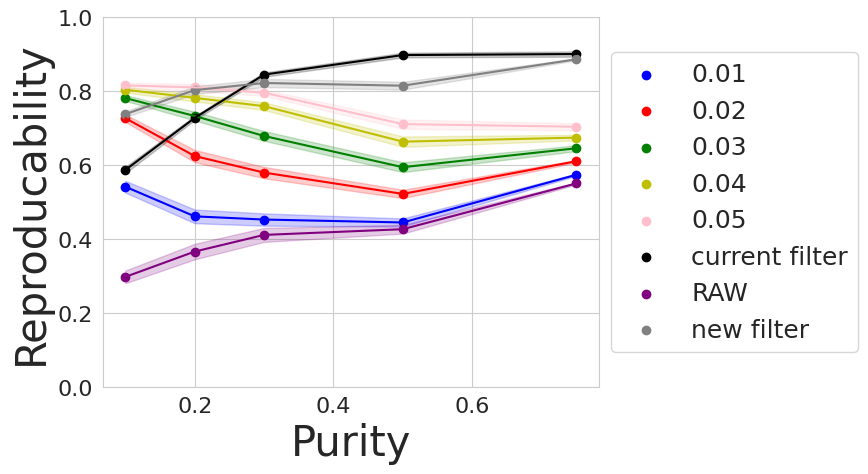

In [96]:
for color, VAF_threshold in zip(
    ['b', 'r', 'g', 'y', 'pink'],
    [0.01, 0.02, 0.03, 0.04, 0.05]
):
    plot_reproducability_from_maf(
        maf_ini_dict, maf_dict, color, label = VAF_threshold,
        current_filter=False, new_filter=False,
        basic=True, VAF_threshold=VAF_threshold, advanced_mode=True
    )

plot_reproducability_from_maf(
    maf_ini_dict, maf_dict, color='black', label = 'current_filter',
    current_filter=True, new_filter=False,
    basic=False, VAF_threshold=0, advanced_mode=True
)
plot_reproducability_from_maf(
    maf_ini_dict, maf_dict, color='purple', label = 'RAW',
    current_filter=False, new_filter=False,
    basic=False, VAF_threshold=0, advanced_mode=True
)

plot_reproducability_from_maf(
    maf_ini_dict, maf_dict, color='grey', label = 'new_filter',
    current_filter=False, new_filter=True,
    basic=False, VAF_threshold=0, advanced_mode=True
)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0,1)
plt.xlabel('Purity')
plt.ylabel('Reproducability')

## VAF vs purity

Just to check, that artificially deluted data is ok, we should check obtained VAFs of mutations for samples

100%|██████████| 77/77 [00:00<00:00, 1830.18it/s]


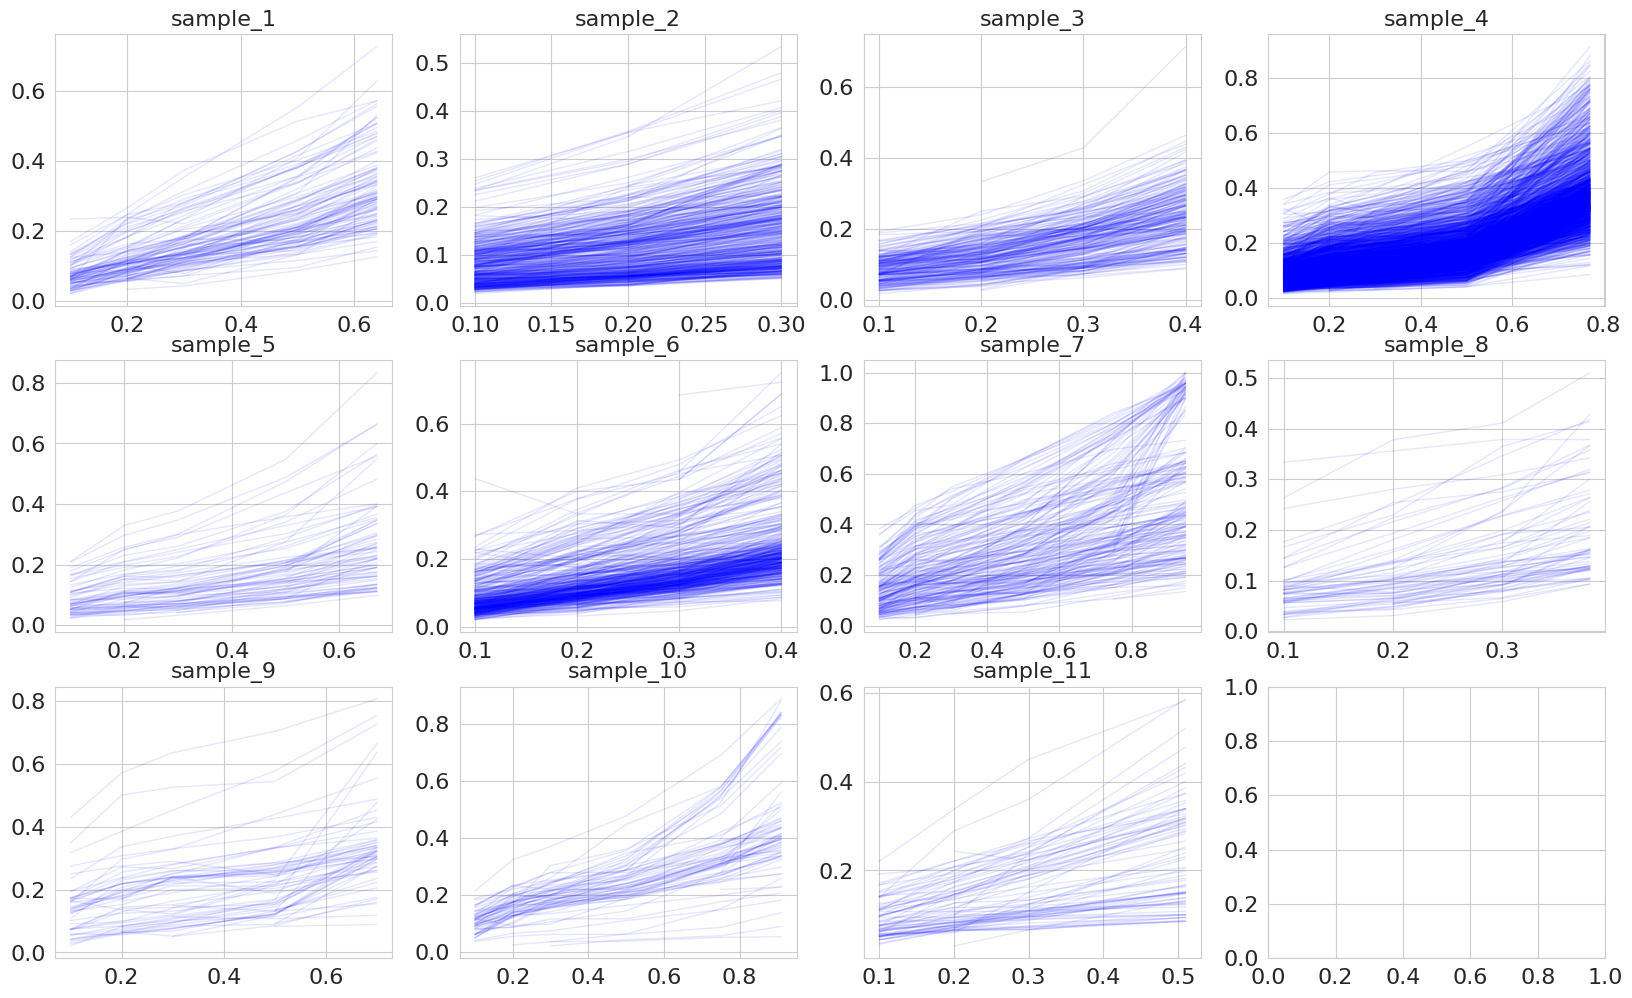

In [97]:
samples2plot = maf_ini_dict.keys()

fig, axs = plt.subplots(3, 4, figsize=(20, 12))

for ax, sample_ini in zip(axs.flat[:len(samples2plot)], samples2plot):
    samples_tmp = [sample for sample in sample2purity.keys() if sample.split('_')[0] == sample_ini]
    muts_VAF = pd.concat(
        [
            maf_dict[sample].Tumor_VAF for sample in samples_tmp
        ]+[maf_ini_dict[sample_ini].Tumor_VAF],
        axis=1
    )
    muts_VAF.columns = [sample2purity[sample] for sample in samples_tmp]+[meta_val_full_df.loc[sample_ini, 'Purity_hephaestus']]
    muts_VAF = muts_VAF[(~muts_VAF.isna()).sum(axis=1)>1]
    muts_VAF_LDT = muts_VAF[muts_VAF.index.isin(TP_mut_set_dict[sample_ini])]

    for vals in tqdm.tqdm(muts_VAF_LDT.values):
        mask = ~np.isnan(vals)
        ax.plot(
            muts_VAF_LDT.columns[mask],
            vals[mask],
            alpha=0.1,
            color='blue',
            linewidth=1,
        )
    ax.set_title(sample_ini)


And for some particular sample

100%|██████████| 63/63 [00:00<00:00, 1730.82it/s]


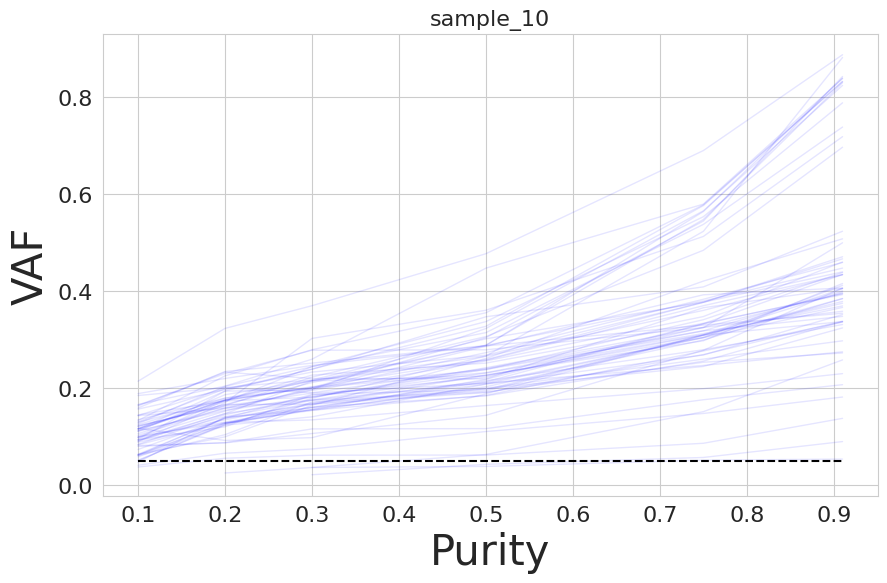

In [98]:
sample_ini = 'sample_10'
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

samples_tmp = [sample for sample in sample2purity.keys() if sample.split('_')[0] == sample_ini]
muts_VAF = pd.concat(
    [
        maf_dict[sample].Tumor_VAF for sample in samples_tmp
    ]+[maf_ini_dict[sample_ini].Tumor_VAF],
    axis=1
)
muts_VAF.columns = [sample2purity[sample] for sample in samples_tmp]+[meta_val_full_df.loc[sample_ini, 'Purity_hephaestus']]
muts_VAF = muts_VAF[(~muts_VAF.isna()).sum(axis=1)>2]
muts_VAF_LDT = muts_VAF[muts_VAF.index.isin(TP_mut_set_dict[sample_ini])]

for vals in tqdm.tqdm(muts_VAF_LDT.values):
    mask = ~np.isnan(vals)
    ax.plot(
        muts_VAF_LDT.columns[mask],
        vals[mask],
        alpha=0.1,
        color='blue',
        linewidth=1,
    )
ax.set_title(sample_ini)
ax.set_xlabel('Purity')
ax.set_ylabel('VAF')
plt.plot([0.1, 0.91], [0.05, 0.05], '--', color='black', )

# Generated data

## Introduced mutations

Extract information about introduced snps and indels from bamsurgeon configure files we have generated in **1_region_search.ipynb** notebook

In [ ]:
mutations_path = os.path.join('..', 'mutations')

In [ ]:
index_df = pd.read_table(
    os.path.join(mutations_path, 'indel_1.txt'), header=None, 
    names = ['chrom', 'start', 'end', 'vaf', 'label', 'ins']
)

In [ ]:
snp_df = pd.read_table(
    os.path.join(mutations_path, 'snp_1.txt'), header=None, 
    names = ['chrom', 'start', 'end', 'vaf', 'label']
)

In [ ]:
ref_df = pd.concat([snp_df, index_df])
ref_df

In [ ]:
ref_array = ref_df.chrom.values + '_' + ref_df.start.values.astype(str)

In [ ]:
indel_array = index_df.chrom.values + '_' + index_df.start.values.astype(str)

## recall and precision

In [ ]:
# MODIFY
# diluted patients; naming should be in line with template
# <patient>_<purity>, where <patient> is name of
# initial sample and purity - expected purity
# depending on VAF of introduced mutations

generated_patients = []
path2generatedmafs = './'

Text(0.5, 1.0, 'precision')

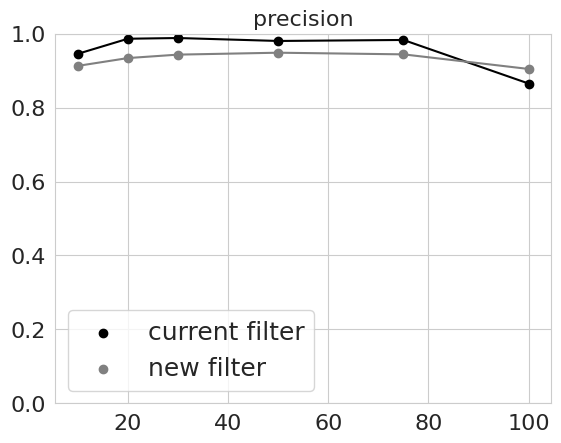

In [401]:
plot_metric_for_generated_pats(
    'new_filter', 'precision', 'grey', generated_patients, 
    path2generatedmafs, maf_name, indel_array,
    ref_arra
)
plot_metric_for_generated_pats(
    'current_filter', 'precision', 'black', generated_patients, 
    path2generatedmafs, maf_name, indel_array,
    ref_arra
)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'recall')

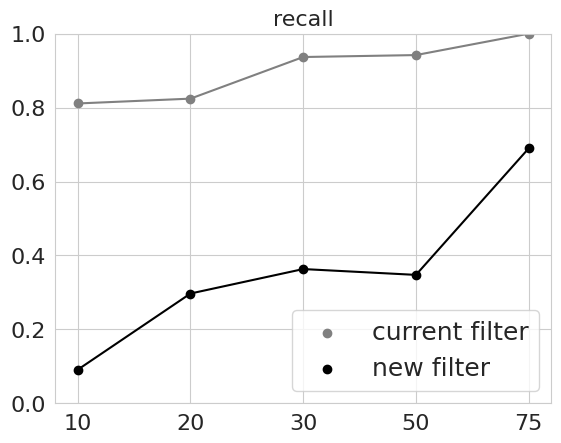

In [95]:
plot_metric_for_generated_pats(
    'new_filter', 'recall', 'grey', generated_patients, 
    path2generatedmafs, maf_name, indel_array,
    ref_arra
)
plot_metric_for_generated_pats(
    'current_filter', 'recall', 'black', generated_patients, 
    path2generatedmafs, maf_name, indel_array,
    ref_arra
)